# PCA——对半导体制造数据降维

降维的目标就是对输入的数目进行削减，由此剔除数据中的噪声并提高机器学习方法的性能。

PCA优点：降低数据的复杂性，识别最重要的多个特征。

缺点：不一定需要，可能损失有用的信息。

适用数据类型：数值型数据

NumPy中实现PCA

伪代码：

去除平均值

计算协方差矩阵

计算协方差矩阵的特征向量和特征值

将特征值从大到小排序

保留最上面的N个特征向量

将数据转换到上述N个特征向量构建的新空间中

In [32]:
from numpy import *

def loadDataSet(fileName, delim='\t'):
    with open(fileName) as f:
        stringArr = [line.strip().split(delim) for line in f.readlines()]
        datArr = [list(map(float, line)) for line in stringArr]
        return mat(datArr)
    
def pca(dataMat, topNfeat=9999999):
    #1.去平均值
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = cov(meanRemoved, rowvar=0)
    eigVals, eigVects = linalg.eig(mat(covMat))
    #2.从大到小对N个值进行排序
    eigValInd = argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:,eigValInd]
    #3.将数据转换到新空间
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals #重构数据
    return lowDDataMat, reconMat

In [58]:
dataMat = loadDataSet('testSet.txt')
lowDMat, reconMat = pca(dataMat, 1)
# lowDMat, reconMat = pca(dataMat, 2)

In [36]:
shape(lowDMat)

(1000, 1)

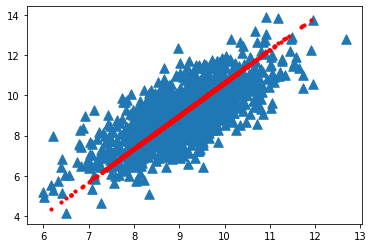

In [60]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s=10, c='red')

In [77]:
#将NaN替换为平均值
def replaceNanWithMean():
    dataMat = loadDataSet('secom.data', ' ')
    numFeat = shape(dataMat)[1] #计算特征数
    for i in range(numFeat):
        #1.计算所有特征的平均值
        meanVal = mean(dataMat[nonzero(~isnan(dataMat[:,i].A))[0], i])
        #2.将所有Nan置为平均值
        dataMat[nonzero(isnan(dataMat[:,i].A))[0], i] = meanVal
    return dataMat

In [79]:
dataMat = replaceNanWithMean()

In [81]:
meanVals = mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals

In [82]:
covMat = cov(meanRemoved, rowvar=0)

In [84]:
eigVals, eigVects = linalg.eig(mat(covMat))

In [86]:
eigVals

array([ 5.34151979e+07,  2.17466719e+07,  8.24837662e+06,  2.07388086e+06,
        1.31540439e+06,  4.67693557e+05,  2.90863555e+05,  2.83668601e+05,
        2.37155830e+05,  2.08513836e+05,  1.96098849e+05,  1.86856549e+05,
        1.52422354e+05,  1.13215032e+05,  1.08493848e+05,  1.02849533e+05,
        1.00166164e+05,  8.33473762e+04,  8.15850591e+04,  7.76560524e+04,
        6.66060410e+04,  6.52620058e+04,  5.96776503e+04,  5.16269933e+04,
        5.03324580e+04,  4.54661746e+04,  4.41914029e+04,  4.15532551e+04,
        3.55294040e+04,  3.31436743e+04,  2.67385181e+04,  1.47123429e+04,
        1.44089194e+04,  1.09321187e+04,  1.04841308e+04,  9.48876548e+03,
        8.34665462e+03,  7.22765535e+03,  5.34196392e+03,  4.95614671e+03,
        4.23060022e+03,  4.10673182e+03,  3.41199406e+03,  3.24193522e+03,
        2.74523635e+03,  2.35027999e+03,  2.16835314e+03,  1.86414157e+03,
        1.76741826e+03,  1.70492093e+03,  1.66199683e+03,  1.53948465e+03,
        1.33096008e+03,  

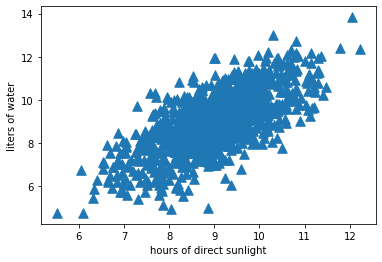

In [90]:
%run extras/createFig1.py

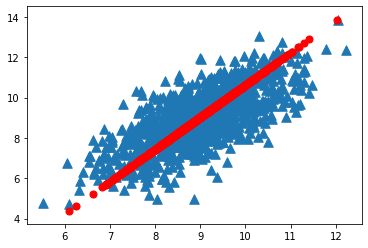

In [107]:
%run extras/createFig2.py

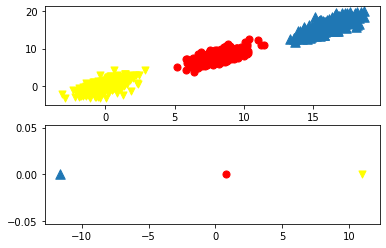

In [109]:
%run extras/createFig3.py

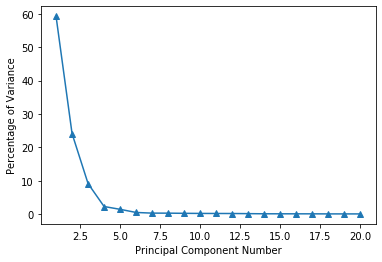

In [110]:
%run extras/createFig4.py